<a href="https://colab.research.google.com/github/diegoaguiardsa/Bootcamp_Analise_de_Dados_SoulCode/blob/main/Projeto%2003/Projeto_Python_para_An%C3%A1lise_de_Dados(Airbnb).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto - Python para Análise de Dados**

Escola: SoulCode Academy

Curso: Bootcamp Analista de Dados - Martech - AD2

Período: Semana 6

Professor: Franciane Rodrigues e Douglas Ribeiro

Aluno: Diego Aguiar

## **Case Airbnb**

**Pergunta de negócio**: Faça uma análise exploratória de dados com a base de dados do Airbnb e indique possíveis oportunidades e/ou ameaças para o empreendimento.

* **Nível - Tratamento e Análise**
  * Verificar todos os passos da estratégia geral de análise de dados;

  * Executar o que for necessário;

  * Todos os passos devem ser comentados;

  * Realizar no mínimo 3 análises apenas numéricas;

  * Realizar plotagens para no mínimo 3 análises;

  * Chegar a uma conclusão de sua análise;

* **Nivel Infra**
  * O Dataset deve ser salvo em ambiente local  (Google Drive) - (bruto e tratado)

  * O Dataset deve ser salvo em ambiente cloud (Cloud Storage) - (bruto e tratado)

* **O que será analisado:**
  * Pontualidade;

  * Organização de código;

  * Atendimento aos requisitos;

  * Capacidade de Pesquisa e Autonomia;

  * Aplicação da Estratégia Geral de Análise de Dados;

**Observação:** Em caso de algum(ns) itens não forem contemplados, realize a entrega do que foi concluído com justificativa. Em momento oportuno, solicitaremos acesso aos ambientes em nuvem do projeto.

Link de apoio: https://www.kaggle.com/datasets/thedevastator/airbnb-price-determinants-in-europe

## **Instalando Bibliotecas**

As linhas de código **"!pip install gcsfs"** e "**!pip install pandera"** são utilizadas para instalar pacotes adicionais em um projeto. O comando "**!pip install gcsfs"** instala a biblioteca "gcsfs", que possibilita o acesso a sistemas de arquivos distribuídos, como o Google Cloud Storage, facilitando a leitura e gravação de arquivos na nuvem. Por sua vez, o comando **"!pip install pandera"** instala o pacote "pandera", que é uma biblioteca de validação de dados para pandas DataFrames. Com o pandera, é possível definir e aplicar regras de validação nos DataFrames, garantindo a consistência e qualidade dos dados utilizados na análise de dados.

In [1]:
!pip install gcsfs

!pip install pandera

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.4 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.1.1
    Uninstalling pydantic-2.1.1:
      Successfully uninstalled pydantic-2.1.1


## **Declarando as Bibliotecas**

Algumas bibliotecas são importadas para facilitar a análise de dados. A linha "import pandas as pd" importa a biblioteca Pandas, que fornece estruturas de dados flexíveis e eficientes para manipulação e análise de dados. A linha "import numpy as np" importa a biblioteca NumPy, que é amplamente utilizada para realizar operações numéricas e matemáticas em arrays multidimensionais. A linha "import os" importa a biblioteca os, que fornece funcionalidades relacionadas ao sistema operacional, como manipulação de caminhos de arquivos. A linha "from google.cloud import storage" importa a biblioteca de armazenamento do Google Cloud, permitindo acesso a serviços de armazenamento em nuvem. A linha "import pandera as pa" importa a biblioteca Pandera como "pa", que é uma biblioteca de validação de dados para pandas DataFrames. Por fim, a linha "import seaborn as sn" importa a biblioteca Seaborn, que é uma biblioteca de visualização de dados baseada no Matplotlib, fornecendo recursos adicionais para a criação de gráficos estatísticos e informativos. Essas bibliotecas serão utilizadas ao longo do projeto para manipular, validar, visualizar e analisar os dados.

In [2]:
import pandas as pd
import numpy as np
import os
from google.cloud import storage
import pandera as pa
import matplotlib.pyplot as plt
import seaborn as sn

## **Extração**

O próximo passo é fazer a extração dos dados. Essa etapa vai depender de onde estarão localizados os dados. Neste projeto em específico serão mostradas como obter os dados localizados em um Google Drive, mas também pelo serviço de armazenamento da GCP (Google Cloud Plataform).


In [3]:
# Será solicitado ao usuário que digite um valor númerico condizente com a opção
# de fonte que se dejesa extrair os dados. Caso o usuário digite algum valor que
# não seja das opções dadas, a estrutura try - except dentro do loop while só
# vai permitir que o usuário continue quando uma opção válida for informada.
while True:
    try:
        opcao = int(input("Deseja extrair os dados de qual fonte? \n[1] Google Drive"
        "\n[2] Google Cloud \n"))
        if opcao == 1:
            # Comando de abertura para Google Drive
            from google.colab import drive
            drive.mount('/content/drive')
            path1 = '/content/drive/MyDrive/Bootcamp Soulcode/Python Pandas/airbnb.csv'
            # Extraindo os dados para um DataFrame
            df = pd.read_csv(path1,sep=',',encoding='ISO-8859-1')
            print("Você está extraindo do Google Drive")
            break
        elif opcao == 2:
            # Configurando da chave de segurança para o acesso ao projeto na GCP
            serviceAccount = '/content/sample_data/projeto-da-aula-13-027cd0b11652.json'
            os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount
            # Aponta qual arquivo do bucket da GCP queremos pegar
            client = storage.Client()
            bucket = client.get_bucket('projetos_bootcamp') # nome da bucket
            bucket.blob('airbnb_bruto') # nome do arquivo
            path2 = 'gs://projetos_bootcamp/Projeto Airbnb/Dados Brutos/airbnb_bruto.csv' # gsutil
            # Extraindo os dados para um DataFrame
            df = pd.read_csv(path2,sep=',',encoding='ISO-8859-1')
            print("Você está extraindo do Google Cloud")
            break
        else:
            print("Informe a opção numérica correta")
    except:
        print("Informe a opção numérica correta")


Deseja extrair os dados de qual fonte? 
[1] Google Drive
[2] Google Cloud 
2
Você está extraindo do Google Cloud


In [4]:
#Mostrando o DataFrame
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [5]:
# Mostrando apenas os nomes dos atributos dos dados
df.columns

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat'],
      dtype='object')

### **Sobre os Dados**

O conjunto de dados a ser utilzado é proveniente de um estudo que analisa os aspectos determinantes dos preços do Airbnb em 10 grandes cidades da União Europeia, com foco no papel da localização.  A base de dados traz atributos relacionados ao tamanho, qualidade, localização e índices inovadores baseados em dados do TripAdvisor utilizados para medir a atratividade dos bairros para que sejam feitos estudos sobre econometria espacial, examinando vários modelos espaciais, incluindo especificações com múltiplas fontes de dependência espacial com objetivo de verificar o que influenciaria nos preços das acomodações no Airbnb. A base de dados que será analisada, a priori, será da cidade de Amsterdã, na Holanda, para reservas em dias úteis.

Nos links a seguir é possível encontrar esses estudos e irá auxiliar na análise de dados do projeto em questão e do Airbnb para conhecer um pouco da sua plataforma e suas políticas para poder indicar possíveis oportunidades e/ou ameaças para a empresa:

Fontes:

1.   https://doi.org/10.1016/j.tourman.2021.104319
2.   https://zenodo.org/record/4446043#.Y9Y9ENJBwUE
3.   https://www.airbnb.com/


#### **Dicionário de Dados**

Segundo o estudo que originou a base de dados, o significado de cada atributo se encontra no dicionário a seguir:

* **realSum - preco_total:** o preço completo da acomodação dado em euros (EUR) por uma estadia de duas noites para duas pessoas.
* **room_type - tipo_quarto:** tipo da acomodação
* **room_shared	- compartilhado:** indica se possui quartos privados;
* **room_private - privado:** indica se possui quartos privados;
* **person_capacity - capacidade:** número máximo de hóspedes permitido na acomodação;
* **host_is_superhost - superhost:**	indica se o anfitrião é superhost;
* **multi:**	indica se o anúncio é de um anfitrião que possui de 2 a 4 anúncios na plataforma;
* **biz:**	indica se o anúncio é de um anfitrião que possui mais de 4 anúncios na plataforma;
* **cleanliness_rating 	- limpeza:** notas sobre limpeza dada pelos hóspedes de 1 a 10;
* **guest_satisfaction_overall - satisfacao:**	Satisfação dos hóspedes numa escala de 1 a 100;
* **bedrooms - quartos:** número de quartos da acomodação (quando for 0 significa que é um studio);
* **dist - centro_dist:**	distância da acomodação ao centro da cidade em quilômetros;
* **metro_dist:**	distância da acomodação à estação de metrô mais próxima em quilômetros;
* **attr_index - atratividade:** índice de atrações ao redor da acomodação;
* **attr_index_norm - atratividade:** índice de atrações ao redor da acomodação numa escala de 0 a 100;
* **rest_index:**	índice de restaurantes ao redor da acomodação;
* **rest_index_norm - restaurante:** - índice de restaurantes ao redor da acomodação numa escala de 0 a 100;
* **lng - longitude:** longitude da localização do anúncio;
* **lat - latitude:** latitude da localização do anúncio.

## **Transformação**

Na etapa de transformação, ocorrem várias etapas fundamentais para preparar os dados de forma adequada antes de serem carregados no destino final. Algums passos possíveis nessa etapa:

* **Padronização:** Durante a padronização, os dados são ajustados para seguir um formato consistente. Isso pode envolver a normalização de valores, como converter datas em um formato específico, unificar nomenclaturas, aplicar regras de formatação para números, letras maiúsculas/minúsculas, entre outros. A padronização facilita a análise e comparação dos dados posteriormente.

* **Limpeza:** A etapa de limpeza é crucial para remover erros, dados incompletos ou inconsistentes. É comum encontrar dados ausentes, outliers, duplicatas ou registros corrompidos. Durante a limpeza, são aplicadas técnicas como preenchimento de valores faltantes, remoção de duplicatas, correção de erros tipográficos e a identificação de outliers para tratamento adequado.

* **Transformação de tipos de dados:** Como mencionado, diferentes sistemas de origem podem usar tipos de dados diferentes. Durante a etapa de transformação, é necessário converter os tipos de dados para um formato comum. Isso garante que os dados sejam consistentes e possam ser processados corretamente no destino.

* **Normalização:** A normalização é o processo de reorganizar e estruturar os dados para eliminar redundâncias e inconsistências. Essa técnica é comumente usada para reduzir a duplicação de dados e melhorar a eficiência de armazenamento. A normalização envolve a decomposição de dados em várias tabelas relacionadas, seguindo as regras da forma normal.

* **Validação e controle de qualidade:** Durante a transformação, é importante garantir que os dados atendam a determinados critérios de qualidade. Isso pode envolver a validação de valores em relação a regras de negócio, a identificação de valores inconsistentes ou a detecção de dados incompletos. A implementação de regras e restrições durante a transformação pode ajudar a garantir a integridade dos dados.

### Backup

Será feito um backup do dataframe original para caso seja feita uma alteração errônea ou quaisquer outros problemas que se possa ocorrer na manpulação do dataframe e, assim, não precisará fazer novamente a extração dos dados no Google Drive ou na GCP.

In [6]:
# Criando um backup do Dataframe original
dfback1 = df

In [7]:
dfback1

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


### **Tradução**

Primeiramente serão traduzidos ou renomeados os atributos do dataframe com o objetivo de melhorar o entendimento sobre os mesmos sem precisar constantemente recorrer ao dicionário de dados.

In [8]:
# Renomeando os atributos da tabela
df.rename(columns={'realSum': 'preco_total', 'room_type':'tipo_quarto',
                   'bedrooms': 'quartos', 'room_shared':'compartilhado',
                   'room_private':'privado', 'person_capacity':'capacidade',
                   'host_is_superhost':'superhost', 'cleanliness_rating':'limpeza',
                   'guest_satisfaction_overall':'satisfacao','dist':'centro_dist',
                   'attr_index_norm': 'atratividade', 'rest_index_norm': 'restaurante',
                   'lat':'latitude', 'lng':'longitude'}, inplace= True)

### **Verificação**

Nos passos a seguir serão feitas verificações para encontrar inconsistência nos dados. Geralmente, são feitas as seguintes tratativas: verificar se existem colunas idênticas, identificar e resolver valores duplicados, identificar e tratar valores nulos, realizar tradução ou renomeação de valores, converter os dados para os tipos apropriados, identificar e corrigir inconsistências lógicas.

In [9]:
# Verificando as informações dos atributos do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1103 non-null   int64  
 1   preco_total    1103 non-null   float64
 2   tipo_quarto    1103 non-null   object 
 3   compartilhado  1103 non-null   bool   
 4   privado        1103 non-null   bool   
 5   capacidade     1103 non-null   float64
 6   superhost      1103 non-null   bool   
 7   multi          1103 non-null   int64  
 8   biz            1103 non-null   int64  
 9   limpeza        1103 non-null   float64
 10  satisfacao     1103 non-null   float64
 11  quartos        1103 non-null   int64  
 12  centro_dist    1103 non-null   float64
 13  metro_dist     1103 non-null   float64
 14  attr_index     1103 non-null   float64
 15  atratividade   1103 non-null   float64
 16  rest_index     1103 non-null   float64
 17  restaurante    1103 non-null   float64
 18  longitud

Para conhecer um pouco mais sobre os dados, será utilizado o método unique( ) que tem como objetivo mostrar quais são os valores únicos do atributo.

In [10]:
# Fazendo um relatório para mostrar os valores únicos de cada atributo.
# O for vai garantir que a atividade seja feita automaticamentepara todos os atributos
for coluna in df:
    valor = (df[coluna].unique())
    print("-"*70)
    msg = f"Valores únicos para o atributo {coluna}:"
    print(f"{msg:^70}")
    print("-"*70)
    print(f"\n{valor}\n")
    print("-"*70)

----------------------------------------------------------------------
              Valores únicos para o atributo Unnamed: 0:              
----------------------------------------------------------------------

[   0    1    2 ... 1100 1101 1102]

----------------------------------------------------------------------
----------------------------------------------------------------------
             Valores únicos para o atributo preco_total:              
----------------------------------------------------------------------

[ 194.03369812  344.24577602  264.10142245  433.52939798  485.55292574
  552.80856748  215.12431748 2771.30738406 1001.80441966  276.52145385
  909.4743749   319.64005343  675.6028402   209.03147189  368.85149861
  337.91859021  313.54720784  447.58981089  243.2451433   933.84575727
  251.91573126  377.28774635  245.58854545  217.70205985  295.03433084
 1032.97166827  270.42860825  524.68774166  599.6766105   516.0171537
  602.25435287  504.06580273 1609.91727

O atributo tipo_quarto possui 3 valores distintos: 'Private room', 'Entire home/apt', 'Shared room'. Esse valores serão substituidos pelas seguintes traduções, respectivamente: 'Quarto Privado', 'Casa Inteira/Apto', 'Quarto Compartilhado'. Isso será mais um procedimento que facilitará a análise de dados.

In [11]:
# Traduzindo os valores do atributo tipo_quarto através do replace()
df['tipo_quarto'].replace(['Private room','Entire home/apt','Shared room'],
                          ['Quarto Privado','Casa Inteira/Apto',
                           'Quarto Compartilhado'], inplace = True)

In [12]:
# Fazendo um relatório para mostrar os valores únicos do atributo tipo_quarto e
# garantir que os valores foram traduzidos
valor = df['tipo_quarto'].unique()
print("-"*70)
msg = f"Valores únicos para o atributo tipo_quarto:"
print(f"{msg:^70}")
print("-"*70)
print(f"\n{valor}\n")
print("-"*70)

----------------------------------------------------------------------
             Valores únicos para o atributo tipo_quarto:              
----------------------------------------------------------------------

['Quarto Privado' 'Casa Inteira/Apto' 'Quarto Compartilhado']

----------------------------------------------------------------------


No contexto desses dados, tem-se os atributos **compartilhado**, que indica se aquela acomodação do anúncio é um quarto compartilhado, e **privado**, que indica se aquela acomodação do anúncio é privado. Será feita um verificação para saber se existe alguma inconsistência em algum dado coletado onde ao mesmo tempo que a acomodação é privada também é compartilhada.

In [13]:
# Como os atributos compatilhado e privado são booleanos, a estratégia
# é criar filtros em relação a valores True dos atributos e verificar
# se há algum dado que tem valor True nos dois atributos simultaneamente
ftcompart = df.compartilhado == True
ftprivado = df.privado == True
df.loc[ftcompart & ftprivado]

,Unnamed: 0,preco_total,tipo_quarto,compartilhado,privado,capacidade,superhost,multi,biz,limpeza,satisfacao,quartos,centro_dist,metro_dist,attr_index,atratividade,rest_index,restaurante,longitude,latitude


Também será verificada se há alguma inconsistência comparando os valores do atributo tipo_quarto com os valores dos atributos compartilha e privado.

In [14]:
# Verificando a frequência de cada valor do atributo tipo_quarto
df['tipo_quarto'].value_counts()

Quarto Privado          559
Casa Inteira/Apto       538
Quarto Compartilhado      6
Name: tipo_quarto, dtype: int64

In [15]:
# Verificando se o valor "Quarto Compartilhado" do atributo tipo_quarto coincide
# com o atributo compartilhado quando seu valor for True.
ftcompart = df.compartilhado == True
fttipo = df.tipo_quarto == "Quarto Compartilhado"
df.loc[ftcompart & fttipo]

,Unnamed: 0,preco_total,tipo_quarto,compartilhado,privado,capacidade,superhost,multi,biz,limpeza,satisfacao,quartos,centro_dist,metro_dist,attr_index,atratividade,rest_index,restaurante,longitude,latitude
73,73,479.225740,Quarto Compartilhado,True,False,2.0,True,0,0,10.0,96.0,1,1.377243,0.077917,549.512960,29.097076,555.058679,38.677287,4.89000,52.36100
247,247,258.008577,Quarto Compartilhado,True,False,3.0,True,1,0,10.0,98.0,1,7.174061,3.005379,64.407387,3.410414,79.805762,5.560980,4.79000,52.36000
536,536,288.707145,Quarto Compartilhado,True,False,3.0,False,1,0,10.0,95.0,1,3.607837,1.653982,106.487738,5.638596,133.462422,9.299854,4.90830,52.40430
975,975,192.861997,Quarto Compartilhado,True,False,4.0,False,1,0,8.0,84.0,1,9.401665,0.640685,49.072988,2.598447,61.315189,4.272531,4.97829,52.30676
1014,1014,209.031472,Quarto Compartilhado,True,False,2.0,False,0,0,9.0,94.0,1,1.994462,1.801099,192.731903,10.205282,253.387221,17.656386,4.87100,52.38500
1102,1102,258.008577,Quarto Compartilhado,True,False,2.0,False,0,0,8.0,90.0,1,0.280204,0.516217,533.962653,28.273677,807.492307,56.267226,4.89295,52.37575


In [16]:
# Verificando se o valor "Quarto Privado" do atributo tipo_quarto coincide
# com o atributo privado quando seu valor for True.
ftprivado = df.privado == True
fttipo = df.tipo_quarto == "Quarto Privado"
df.loc[ftprivado & fttipo]

,Unnamed: 0,preco_total,tipo_quarto,compartilhado,privado,capacidade,superhost,multi,biz,limpeza,satisfacao,quartos,centro_dist,metro_dist,attr_index,atratividade,rest_index,restaurante,longitude,latitude
0,0,194.033698,Quarto Privado,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Quarto Privado,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Quarto Privado,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Quarto Privado,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Quarto Privado,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,1094,228.716050,Quarto Privado,False,True,3.0,True,0,0,10.0,98.0,1,7.628766,2.927773,61.792169,3.271936,76.466601,5.328303,4.79162,52.34422
1096,1096,295.034331,Quarto Privado,False,True,2.0,False,0,1,8.0,86.0,1,4.880430,0.884337,107.334737,5.683446,132.699137,9.246667,4.84422,52.34116
1097,1097,356.197127,Quarto Privado,False,True,4.0,True,0,0,10.0,95.0,1,2.169253,0.212113,224.433556,11.883906,291.785726,20.332049,4.91118,52.35718
1099,1099,233.637194,Quarto Privado,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910


### **Limpeza**

Após a verificação é possível concluir quais atributos serão excluidos por não serem relevantes para a análise:

* **Unnamed: 0** porque é apenas um atributo de identificação ordinal do anúncio coletado;
* **compartilhado** porque é uma informação redundante com a já fornecida pelo atributo tipo_quarto;
* **privado** porque é uma informação redundante com a já fornecida pelo atributo tipo_quarto;
* **attr_index** porque é uma informação redundante com a já fornecida pelo atributo atratividade;
* **rest_index** porque é uma informação redundante com a já fornecida pelo atributo restaurante.

In [17]:
# Utilizando o drop() para excluir as colunas desejadas
df.drop(['Unnamed: 0','compartilhado', 'privado',
         'attr_index', 'rest_index'], axis=1, inplace = True)

In [18]:
df

,preco_total,tipo_quarto,capacidade,superhost,multi,biz,limpeza,satisfacao,quartos,centro_dist,metro_dist,atratividade,restaurante,longitude,latitude
0,194.033698,Quarto Privado,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,4.166708,6.846473,4.90569,52.41772
1,344.245776,Quarto Privado,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,33.421209,58.342928,4.90005,52.37432
2,264.101422,Quarto Privado,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,3.985908,6.646700,4.97512,52.36103
3,433.529398,Quarto Privado,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,26.119108,60.973565,4.89417,52.37663
4,485.552926,Quarto Privado,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,29.272733,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,2486.115342,Casa Inteira/Apto,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,9.594573,15.699521,4.85869,52.37677
1099,233.637194,Quarto Privado,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,5.719989,9.391335,4.83611,52.34910
1100,317.062311,Quarto Privado,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,23.323524,43.616927,4.88897,52.37798
1101,1812.855904,Casa Inteira/Apto,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,13.658524,23.454022,4.90688,52.35794


### **Tipagem**

A tipagem tem por objetivo de garantir qual o melhor tipo de dado caracteriza aquele valor ou que respeite as características e requisitos do sistema de destino. Será realizada a tipagem do atributo capacidade que se encontra em float, mas pela característica do atributo seria mais adequado os valores serem int. (Não existe capacidade de pessoas fracionadas)

In [19]:
# Através do método astype(int) é possível trocarrocando o tipo da coluna
# capacidade para inteiro, pois antes era float.
df['capacidade'] = df['capacidade'].astype(int)

In [20]:
# Verificando se o tipagem ocorreu com sucesso
df.dtypes

preco_total     float64
tipo_quarto      object
capacidade        int64
superhost          bool
multi             int64
biz               int64
limpeza         float64
satisfacao      float64
quartos           int64
centro_dist     float64
metro_dist      float64
atratividade    float64
restaurante     float64
longitude       float64
latitude        float64
dtype: object

### **Qualidade dos Dados**

Esse passo tem como objetivo definir um esquema para um DataFrame, especificando os tipos de dados e as restrições para cada coluna. Essa abordagem é valiosa para garantir a integridade dos dados ao criar ou manipular DataFrames utilizando a biblioteca Pandas.

Após definir o esquema do Dataframe, o Dataframe pode ser submetido, sempre que necessário, a uma validação com base no esquema previamente definido. Essa validação implica que cada coluna do DataFrame é verificada em conformidade com as regras e restrições estabelecidas no esquema. Caso alguma coluna não esteja em conformidade com as regras, uma exceção será lançada, fornecendo informações detalhadas sobre a falha na validação.

In [21]:
# Definindo o Esquema do Dataframe
schema = pa.DataFrameSchema({'preco_total': pa.Column(pa.Float),
                             'tipo_quarto': pa.Column(pa.String),
                             'capacidade': pa.Column(pa.Int),
                             'superhost': pa.Column(pa.Bool),
                             'multi': pa.Column(pa.Int),
                             'biz': pa.Column(pa.Int),
                             'limpeza': pa.Column(pa.Float),
                             'satisfacao': pa.Column(pa.Float),
                             'quartos': pa.Column(pa.Int),
                             'centro_dist': pa.Column(pa.Float),
                             'metro_dist': pa.Column(pa.Float),
                             'atratividade': pa.Column(pa.Float),
                             'restaurante': pa.Column(pa.Float),
                             'longitude': pa.Column(pa.Float),
                             'latitude': pa.Column(pa.Float),
                            })
# Validando o DataFrame
schema.validate(df)

,preco_total,tipo_quarto,capacidade,superhost,multi,biz,limpeza,satisfacao,quartos,centro_dist,metro_dist,atratividade,restaurante,longitude,latitude
0,194.033698,Quarto Privado,2,False,1,0,10.0,93.0,1,5.022964,2.539380,4.166708,6.846473,4.90569,52.41772
1,344.245776,Quarto Privado,4,False,0,0,8.0,85.0,1,0.488389,0.239404,33.421209,58.342928,4.90005,52.37432
2,264.101422,Quarto Privado,2,False,0,1,9.0,87.0,1,5.748312,3.651621,3.985908,6.646700,4.97512,52.36103
3,433.529398,Quarto Privado,4,False,0,1,9.0,90.0,2,0.384862,0.439876,26.119108,60.973565,4.89417,52.37663
4,485.552926,Quarto Privado,2,True,0,0,10.0,98.0,1,0.544738,0.318693,29.272733,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,2486.115342,Casa Inteira/Apto,2,False,0,0,10.0,100.0,1,2.375833,1.436054,9.594573,15.699521,4.85869,52.37677
1099,233.637194,Quarto Privado,2,False,1,0,10.0,90.0,1,4.719736,0.322263,5.719989,9.391335,4.83611,52.34910
1100,317.062311,Quarto Privado,2,False,1,0,10.0,92.0,1,0.598355,0.751993,23.323524,43.616927,4.88897,52.37798
1101,1812.855904,Casa Inteira/Apto,4,False,0,0,8.0,84.0,5,1.943020,0.388532,13.658524,23.454022,4.90688,52.35794


## **Carregamento**

A última etapa do processo ETL é a etapa de carregamento. Nessa etapa, os dados transformados e preparados são carregados no destino final, que pode ser um data warehouse, um banco de dados operacional ou qualquer outro sistema de armazenamento utilizado pela organização. Neste projeto em específico os arquivos serão carregados em arquivo .csv e salvo no Google Drive ou na GCP (Google Cloud Plataform).

In [22]:
# Um arquivo csv será criado a partir dos dados já tratados e será salvo ou no
# Google Drive ou no Google Cloud a partir da opção escolhida na etapa de extração
if opcao == 1:
    df.to_csv('/content/drive/MyDrive/Bootcamp Soulcode/Python Pandas/airbnb_tratado.csv', index=False)
elif opcao == 2:
    df.to_csv('gs://projetos_bootcamp/Projeto Airbnb/Dados Tratados/airbnb_tratados.csv', index=False)
else:
    pass

## **Análise**

In [23]:
# Criando um backup do Dataframe original tratado
dfback2 = df

In [24]:
dfback2

,preco_total,tipo_quarto,capacidade,superhost,multi,biz,limpeza,satisfacao,quartos,centro_dist,metro_dist,atratividade,restaurante,longitude,latitude
0,194.033698,Quarto Privado,2,False,1,0,10.0,93.0,1,5.022964,2.539380,4.166708,6.846473,4.90569,52.41772
1,344.245776,Quarto Privado,4,False,0,0,8.0,85.0,1,0.488389,0.239404,33.421209,58.342928,4.90005,52.37432
2,264.101422,Quarto Privado,2,False,0,1,9.0,87.0,1,5.748312,3.651621,3.985908,6.646700,4.97512,52.36103
3,433.529398,Quarto Privado,4,False,0,1,9.0,90.0,2,0.384862,0.439876,26.119108,60.973565,4.89417,52.37663
4,485.552926,Quarto Privado,2,True,0,0,10.0,98.0,1,0.544738,0.318693,29.272733,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,2486.115342,Casa Inteira/Apto,2,False,0,0,10.0,100.0,1,2.375833,1.436054,9.594573,15.699521,4.85869,52.37677
1099,233.637194,Quarto Privado,2,False,1,0,10.0,90.0,1,4.719736,0.322263,5.719989,9.391335,4.83611,52.34910
1100,317.062311,Quarto Privado,2,False,1,0,10.0,92.0,1,0.598355,0.751993,23.323524,43.616927,4.88897,52.37798
1101,1812.855904,Casa Inteira/Apto,4,False,0,0,8.0,84.0,5,1.943020,0.388532,13.658524,23.454022,4.90688,52.35794


In [25]:
# O método describe retorna um resumo de medidas estatística descritivas
# de todos os atributos.
df.describe()

,preco_total,capacidade,multi,biz,limpeza,satisfacao,quartos,centro_dist,metro_dist,atratividade,restaurante,longitude,latitude
count,1103.000000,1103.000000,1103.00000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000
mean,545.020526,2.792384,0.30825,0.115141,9.461469,94.362647,1.282865,2.841621,1.089439,14.350154,23.799081,4.891158,52.364858
std,416.974314,1.044151,0.46198,0.319336,0.798201,6.089691,0.740178,2.123245,0.836546,10.433764,16.487400,0.038882,0.019467
min,128.887118,2.000000,0.00000,0.000000,4.000000,20.000000,0.000000,0.015059,0.036530,2.167346,3.545205,4.775500,52.291100
25%,309.797764,2.000000,0.00000,0.000000,9.000000,92.000000,1.000000,1.302058,0.462983,6.772912,11.390772,4.871000,52.354580
50%,430.248635,2.000000,0.00000,0.000000,10.000000,96.000000,1.000000,2.341366,0.856010,11.023286,18.135084,4.890010,52.365590
75%,657.324303,4.000000,1.00000,0.000000,10.000000,98.000000,2.000000,3.648138,1.510629,20.462373,32.700846,4.907315,52.375260
max,7782.907225,6.000000,1.00000,1.000000,10.000000,100.000000,5.000000,11.187100,4.411915,100.000000,100.000000,5.010770,52.423480


Serão calculadas as correlações de Pearson de todas as variáveis e será utilizado como estratégia de análise colocar os dados em um mapa de calor para visualizar de uma maneira mais eficaz quais serão correlações relevantes.

<ipython-input-26-09b2527de324>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

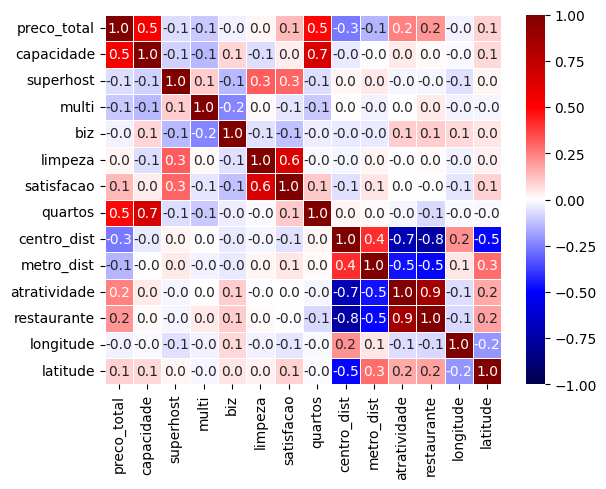

In [26]:
# O método corr() é responsável por calcular todas as correlações existentes
# no dataframe e utilizando o heatmap() da biblioteca seaborn, é possível
# o mapa de calor baseado nessas informações

correlation = df.corr()
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=0.7,
                  vmin=-1, vmax=1, cmap='seismic')
plot

Depois de verificar as correlações, foram escolhidas as seguintes correlações para se elaborar gráficos de dispersão:

* Preço Total x Capacidade Máxima;
* Preço Total x Quantidade de Quartos;
* Capacidade Máxima x Quantidade de Quartos;
* Preço Total x Distância do Centro da Cidade;
* Satisfação do Cliente x Nota de Limpeza;
* Índice de Atração x Distância do Centro da Cidade;
* Índice de Restaurantes x Distância do Centro da Cidade;
* Índice de Atração x Índice Restaurantes.

<Axes: title={'center': 'Preço Total x Capacidade Máxima'}, xlabel='capacidade', ylabel='preco_total'>

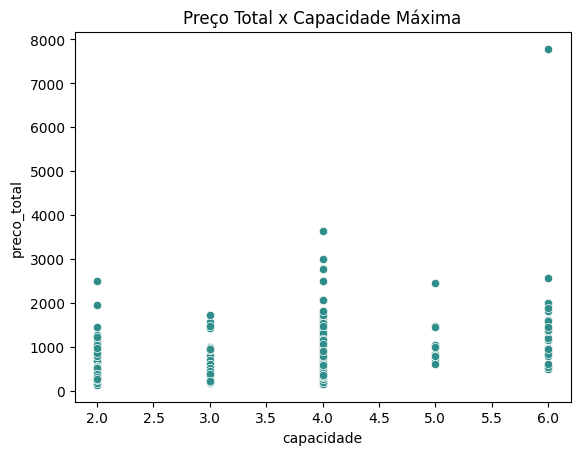

In [28]:
# Gráfico de Dispersão Preço Total x Capacidade Máxima
plt.title('Preço Total x Capacidade Máxima')
sn.scatterplot(data=df, x='capacidade', y='preco_total',color='#2F8E89')

<Axes: title={'center': 'Preço Total x Quantidade de Quartos'}, xlabel='quartos', ylabel='preco_total'>

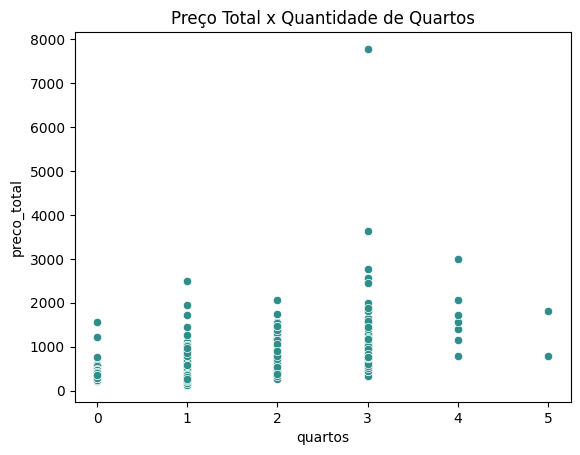

In [30]:
# Gráfico de Dispersão Preço Total x Quantidade de Quartos
plt.title('Preço Total x Quantidade de Quartos')
sn.scatterplot(data=df, x='quartos', y='preco_total',color='#2F8E89')

<Axes: title={'center': 'Capacidade Máxima x Quantidade de Quartos'}, xlabel='quartos', ylabel='capacidade'>

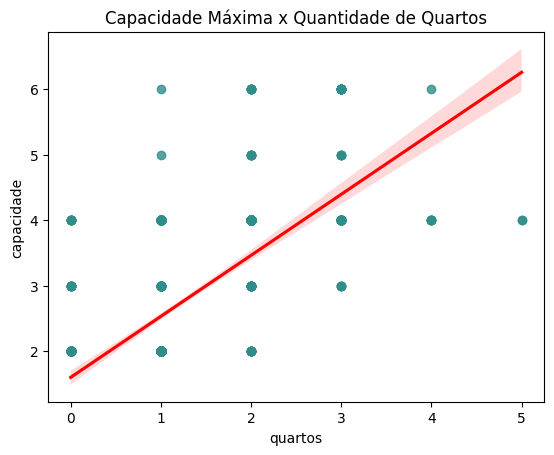

In [32]:
# Gráfico de Dispersão Capacidade Máxima x Quantidade de Quartos
plt.title('Capacidade Máxima x Quantidade de Quartos')
sn.regplot(data=df, x='quartos', y='capacidade',color='#2F8E89', line_kws={'color': 'red'})

<Axes: title={'center': 'Preço Total x Distância do Centro da Cidade'}, xlabel='centro_dist', ylabel='preco_total'>

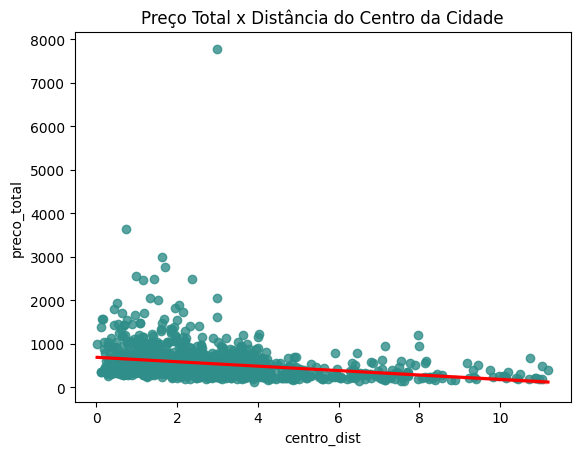

In [ ]:
# Gráfico de Dispersão Preço Total x Distância do Centro da Cidade
plt.title('Preço Total x Distância do Centro da Cidade')
sn.scatterplot(data=df.loc[df.cidade == 'Londres'], x='centro_dist', y='restaurante', color='#2F8E89')
sn.regplot(data=df, x='centro_dist', y='preco_total',color='#2F8E89',line_kws={'color': 'red'})

<Axes: title={'center': 'Satisfação do Cliente x Nota de Limpeza'}, xlabel='limpeza', ylabel='satisfacao'>

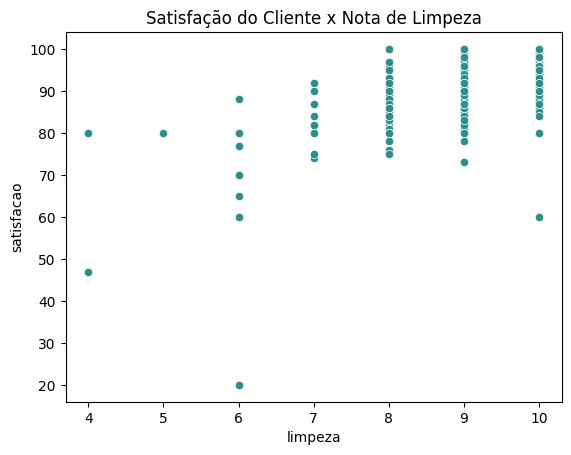

In [33]:
# Gráfico de Dispersão Satisfação do Cliente x Nota de Limpeza
plt.title('Satisfação do Cliente x Nota de Limpeza')
sn.scatterplot(data=df, x='limpeza', y='satisfacao',color='#2F8E89')

<Axes: title={'center': 'Índice de Atração x Distância do Centro da Cidade'}, xlabel='centro_dist', ylabel='atratividade'>

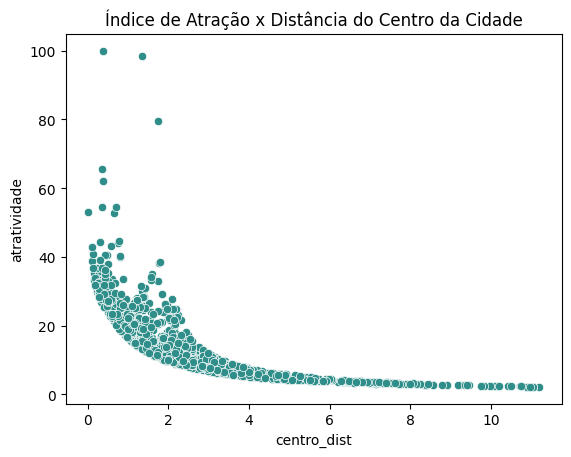

In [34]:
# Gráfico de Dispersão Índice de Atração x Distância do Centro da Cidade
plt.title('Índice de Atração x Distância do Centro da Cidade')
sn.scatterplot(data=df, x='centro_dist', y='atratividade',color='#2F8E89')

<Axes: title={'center': 'Índice de Restaurantes x Distância do Centro da Cidade'}, xlabel='centro_dist', ylabel='restaurante'>

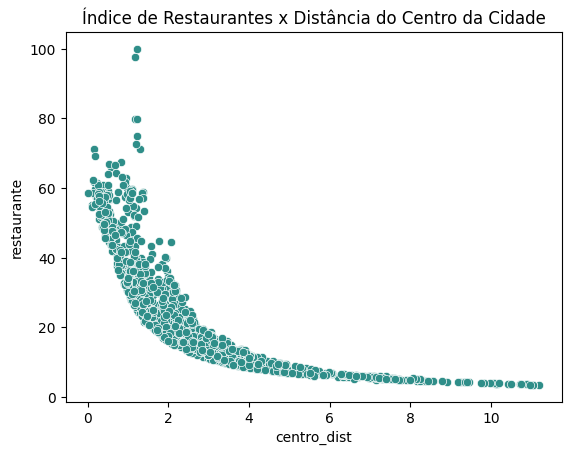

In [35]:
# Gráfico de Dispersão Índice de Restaurantes x Distância do Centro da Cidade
plt.title('Índice de Restaurantes x Distância do Centro da Cidade')
sn.scatterplot(data=df, x='centro_dist', y='restaurante', color='#2F8E89')

<Axes: title={'center': 'Índice de Atração x Índice de Restaurante'}, xlabel='restaurante', ylabel='atratividade'>

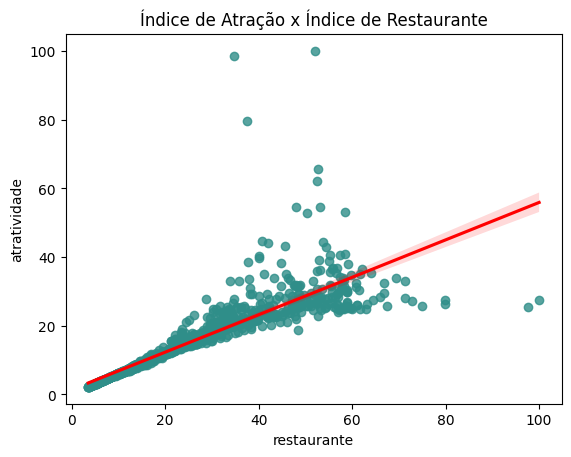

In [ ]:
# Gráfico de Dispersão Índice de Atração x Índice de Restaurante
plt.title('Índice de Atração x Índice de Restaurante')
sn.regplot(data=df, x='restaurante', y='atratividade',
           color='#2F8E89',line_kws={'color': 'red'})

Algumas análises sobre os gráficos:
* O preço da acomodação tem uma correlação moderada com a capacidade total da acomodação, o que mostra que uma das variáveis que compõe o preço seria a quantidade de pessoas que são aceitas na acomodação. Quanto maior a capacidade da acomodação, há uma tendência de o preço ser mais caro;
* O preço da acomodação também tem uma correlação moderada com a quantidade de quartos, o que mostra que uma das variáveis que compõe o preço seria a quantidade de quartos. Quanto maior a quantidade de quartos, há uma tendência de o preço ser mais caro;
* Se for analisada a correlação entre a capacidade total e a quantidade de quartos da acomodação é possível ver que ela é forte e até esperado, pois a tendência é que quanto maior seja o número de quartos maior será a capacidade da acomodação;
* O preço da acomodação tem uma correlação fraca com a distância da acomodação ao centro da cidade, o que mostra que a distância ao centro da cidade também pode influenciar no preço da acomodação. Quanto maior a distância da acomodação ao centro, há uma tendência de o preço ser mais barato;
* O nível de satisfação do hóspede tem uma correlação moderada com a nota de limpeza dada pelo mesmo, o que mostra que a nota de limpeza é uma das variáveis que pode influenciar na satisfação do hóspede. Faz sentindo, pois se for analisada a política de avaliação dos anfitriões é possível constatar que são pautadas nos seguintes quesitos: Limpeza, Exatidão do Anúncio, Comunicação, Localização, Check-In, Custo-benefício;
* A distância da acomodação ao centro possui uma correlação forte com o índice de atração, mostrando que possivelmente as melhores atrações da cidade Amsterdã estão localizadas no seu centro. Quanto maior a distância da acomodação ao centro, menor o nível de atratividade em seu entorno;
* A distância da acomodação ao centro também possui uma correlação forte com o índice de restaurantes, mostrando que possivelmente as melhores restaurantes da cidade Amsterdã estão localizadas no seu centro. Quanto maior a distância da acomodação ao centro, menor a quantidade e/ou qualidade de restaurantes em seu entorno;
* O índice de atração possui uma correlação muito forte com o índice de restaurantes, mostrando que possivelmente quando se há uma boa quantidade e/ou qualidade de atrações no entorno da acomodação também há uma boa quantidade e/ou qualidade de restaurantes no entorno. Isso ajuda a mensurar se uma acomodação é bem localizada por proporcionar várias opções de atividades para os hóspedes.

Após analisar o gráfico Preço Total x Distância do Centro da Cidade, verificou-se que apatentemente grande parte dos anúncios são de acomodações de até 4 km de distância do centro da cidade. Um histograma pode mostrar de maneira mais efetiva essa informação.

<Axes: title={'center': 'Distânciada da Acomodação ao Centro da Cidade'}, xlabel='centro_dist', ylabel='Count'>

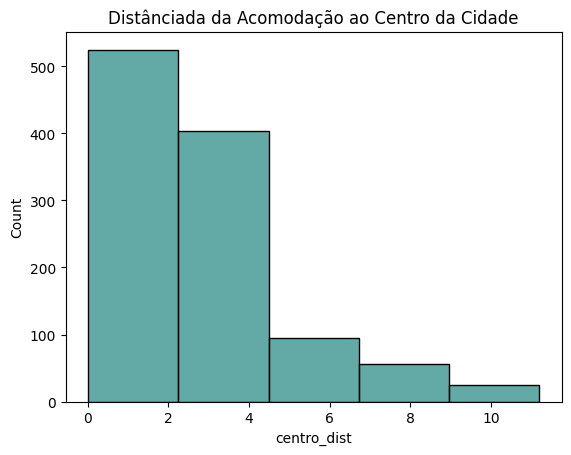

In [ ]:
# Fazendo um histograma para mostrar as frequências referente a distância
# da acomodação ao centro da cidade.
plt.title('Distânciada da Acomodação ao Centro da Cidade')
sn.histplot(data=df, x='centro_dist', bins=5, color='#2F8E89')

Algumas análises sobre o gráfico:
* Através do histograma e do resumo das medidas estatística feitas previamente é possível afirmar que mais de 75% dos anúncios são de acomodações localizadas até 4 km do centro da cidade. Isso pode ser justificado pelo fato que o nível de atratividade é maior perto do centro da cidade e, portanto, desperta mais interesse em pessoas que possuem acomodações nessa localização a serem anfitriões e anunciarem no Airbnb. Possivelmente essas acomodações são aquelas que o Airbnb classifica como um **Achado** que são aquelas acomodações que costumam estar sempre totalmente reservadas.

A próxima análise consiste em verificar as quantidades de cada modalidade de acomodação oferecida nos anúncios da plataforma. Para tal, utiliza-se um gráfico de barras.

<Axes: title={'center': 'Tipos de Acomodações'}>

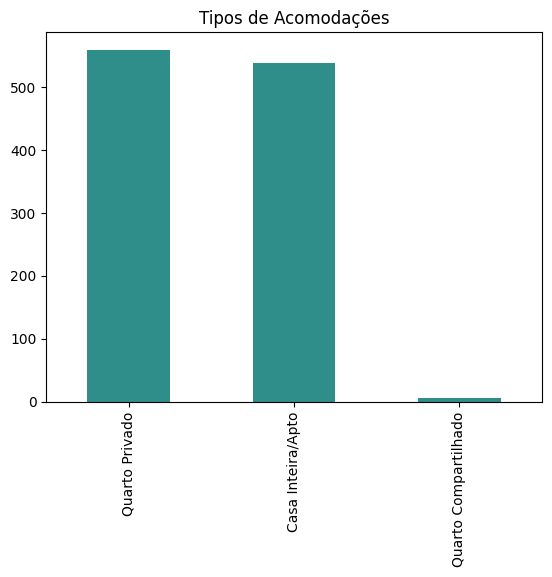

In [ ]:
# Fazendo um gráfico de barras para mostrar as frequências dos tipo de acomodações
plt.title('Tipos de Acomodações')
df['tipo_quarto'].value_counts().plot.bar(color='#2F8E89')

Algumas análises sobre o gráfico:
* A quantidade de Quartos Compartilhados nos anúncios verificados é extremamente pequena quando comparado com as modalidades de Quarto Privado ou Casa Inteira/Apto. Isso pode ser uma oportunidade para que a plataforma possa estimular a modalidade de Quarto Compatilhado entre os anfitriões para estadias rápidas de até duas noites em dias úteis haja vista que quartos compartilhados tendem a ser mais baratos. Dessa forma será possível diminuir a ociosidade das acomodações, aumentando o faturamento dos anfitriões, aumentando o faturamento da plataforma e aumentando a variabilidade de opções para os hóspedes.

Analisando a capacidade máxima das acomodações através de um gráfico de barras.

<Axes: >

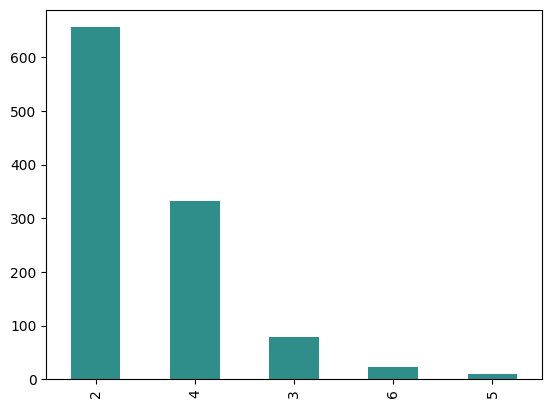

In [ ]:
# Fazendo um gráfico de barras para mostrar as frequências da capacidade máxima
# das acomodações
df['capacidade'].value_counts().plot.bar(color='#2F8E89')

Algumas análises sobre o gráfico:
* A capacidade máxima da maioria das acomodações anunciadas são de 2 pessoas. Talvez seja uma oportunidade da plataforma promover algum tipo de campanha para atrair anfitriões que possam hospedar em acomodações com uma capacidade maior para atender a um público maior, viagens de famílias, por exemplo.

O próximo passo da análise consiste em verificar a quantidade de anúncios que são de anfitriões superhost.

<Axes: title={'center': 'Anfitrião Superhost'}>

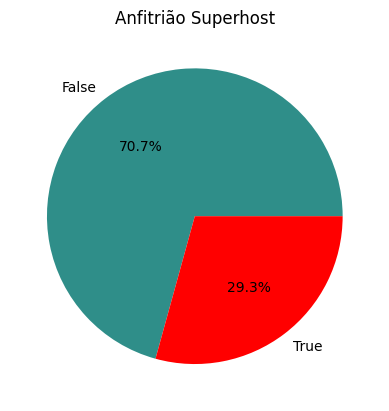

In [ ]:
# Gráfico de pizza para Anfitrião Superhost
plt.title('Anfitrião Superhost')
df.groupby('superhost').size().plot.pie(colors = ['#2F8E89','red'], autopct='%1.1f%%')

Algumas análises sobre o gráfico:

* O gráfico mostra que grande parte dos afitriões dos anúncios não são superhost. O programa Superhost reconhece e recompensa os anfitriões mais experientes e mais bem avaliados no Airbnb.  Isso é um parâmetro importante que mostra uma certa profissionalização dos afitriões melhorando a atratividade da plataforma. Esse dado pode ser uma oportunidade para realizar um estudo para avaliar se o programa de superhost está tendo o retorno esperado e se precisa fazer algum ajuste nas condições do programa para torná-lo ainda mais atrativo para os anfitriões.

Serão analisadas quais as quantidades de acomodações de anfitriões que possuem mais de 2 anúncios na plataforma.

<Axes: title={'center': 'Acomodações de anfitriões com mais de dois anúncios'}, xlabel='tipo_quarto'>

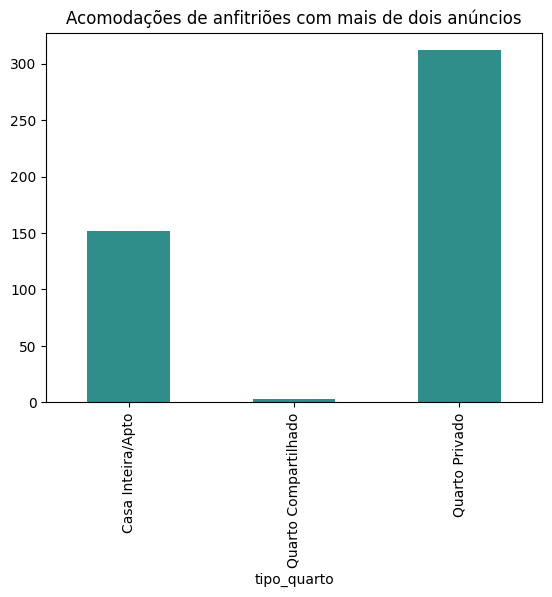

In [ ]:
# Gráfico de barras para acomodações de anfitriões com mais de 2 anúncios
plt.title('Acomodações de anfitriões com mais de dois anúncios')
ftmulti = df['multi'] == 1
ftbiz = df['biz'] == 1
f = df[ftmulti | ftbiz].groupby('tipo_quarto').size()
f.plot.bar(color='#2F8E89')

<Axes: title={'center': 'Acomodações de anfitriões com apenas um anúncio'}, xlabel='tipo_quarto'>

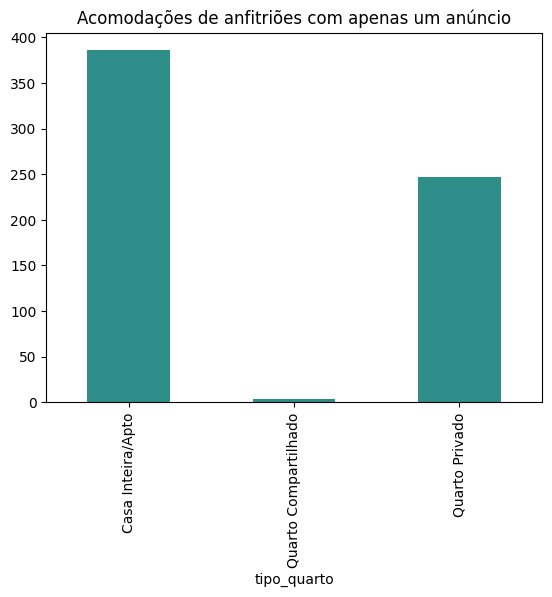

In [ ]:
# Gráfico de barras para acomodações de anfitriões com  apenas um anúncio
plt.title('Acomodações de anfitriões com apenas um anúncio')
ftmulti = df['multi'] == 0
ftbiz = df['biz'] == 0
f = df[ftmulti & ftbiz].groupby('tipo_quarto').size()
f.plot.bar(color='#2F8E89')

Algumas análises sobre os gráficos:

* Os atributos multi e biz indicam acomodações de anfitriões que possuem mais de um anúncio listado na plataforma. Esses são parâmetros importantes que também ajudam a mostrar uma certa profissionalização dos afitriões melhorando a atratividade da plataforma. Esse dado pode ser uma oportunidade para realizar um estudo para avaliar a viabilidade de se criar um programa que o anfitrião tenha acesso a incentivos exclusivos por possuir múltiplas acomodações anunciadas na plataforma.

## **Conclusões**

Depois de fazer as análises dos dados referente aos anúncios no Airbnb na cidade de Amsterdã, na Holanda, para reservas em dias úteis, é possível fazer as seguintes conclusões:

* Quanto maior a capacidade da acomodação, há uma tendência de o preço da acomodação ser mais caro;
* Quanto maior a quantidade de quartos, há uma tendência de o preço da acomodação ser mais caro;
* Quanto maior a distância da acomodação ao centro, há uma tendência de o preço da acomodação ser mais barato;
* Mais de 75% dos anúncios são de acomodações localizadas até 4 km do centro da cidade;
* Possivelmente as melhores atrações e os melhores restaurantes da cidade de Amsterdã estão localizadas no seu centro e, por conta disso, há uma tendência de acomodações com altos níveis de atratividade serem mais caras;
* Notando que a localização da acomodação exerce influência sobre o seu preço, o Airbnb pode tomar isso como uma oportunidade de aplicar uma metodologia para sempre mapear os índices de atratividade e divulgar de tal forma a incentivar novos anfitriões, que possuem acomodações em locais com bons índices de atratividade, a anunciar na plataforma;
* A quantidade de Quartos Compartilhados nos anúncios verificados é extremamente pequena quando comparado com as modalidades de Quarto Privado ou Casa Inteira/Apto. Isso pode ser uma oportunidade para que a plataforma possa estimular a modalidade de Quarto Compatilhado entre os anfitriões para estadias rápidas de até duas noites em dias úteis haja vista que quartos compartilhados tendem ser mais baratos. Dessa forma será possível diminuir a ociosidade das acomodações, aumentando o faturamento dos anfitriões, aumentando o faturamento da plataforma e aumentando a variabilidade de opções para os hóspedes;
* A capacidade máxima da maioria das acomodações anunciadas são de 2 pessoas. Talvez seja uma oportunidade da plataforma promover algum tipo de campanha para atrair anfitriões que possam hospedar em acomodações com uma capacidade maior para atender a um público maior, viagens de famílias, por exemplo;
* Grande parte dos afitriões dos anúncios não são superhost. O programa Superhost reconhece e recompensa os anfitriões mais experientes e mais bem avaliados no Airbnb. Isso é um parâmetro importante que mostra uma certa profissionalização dos afitriões melhorando a atratividade da plataforma. Esse dado pode ser uma oportunidade para realizar um estudo para avaliar se o programa de superhost está tendo o retorno esperado e se precisa fazer algum ajuste nas condições do programa para torná-lo ainda mais atrativo para os anfitriões;
* Os atributos multi e biz indicam acomodações de anfitriões que possuem mais de um anúncio listado na plataforma. Esses são parâmetros importantes que também ajudam a mostrar uma certa profissionalização dos afitriões melhorando a atratividade da plataforma. Esse dado pode ser uma oportunidade para realizar um estudo para avaliar a viabilidade de se criar um programa que o anfitrião tenha acesso a incentivos exclusivos por possuir múltiplas acomodações anunciadas na plataforma;
* Como sugestão para estudos futuros, fazer a coleta de dados levando em conta uma linha do tempo para poder verificar a sazonalidade dos preços das acomodações e verificar outros fatores que influenciam os preços.
